In [1]:
import ROOT 
import uproot
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.18/04


In [2]:
gen_jet_events  = uproot.open('TTJets_DiLept_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU_1.root')['Delphes']['GenJet']
gen_jet_eta     = gen_jet_events['GenJet.Eta'].array()
gen_jet_phi     = gen_jet_events['GenJet.Phi'].array()
gen_jet_pt      = gen_jet_events['GenJet.PT'].array()
gen_jet_mass    = gen_jet_events['GenJet.Mass'].array()
gen_jet_btag    = gen_jet_events['GenJet.BTag'].array()
gen_jet_charge  = gen_jet_events['GenJet.Charge'].array()

In [3]:
gen_part_events  = uproot.open('TTJets_DiLept_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU_1.root')['Delphes']['Particle']
gen_part_eta     = gen_part_events['Particle.Eta'].array()
gen_part_phi     = gen_part_events['Particle.Phi'].array()
gen_part_pt      = gen_part_events['Particle.PT'].array()
gen_part_mass    = gen_part_events['Particle.Mass'].array()
gen_part_pid     = gen_part_events['Particle.PID'].array()
gen_part_charge  = gen_part_events['Particle.Charge'].array()

In [4]:
gen_met_events  = uproot.open('TTJets_DiLept_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU_1.root')['Delphes']['GenMissingET']
gen_met_eta     = gen_met_events['GenMissingET.Eta'].array()
gen_met_phi     = gen_met_events['GenMissingET.Phi'].array()
gen_met_pt      = gen_met_events['GenMissingET.MET'].array()

In [5]:
tt_event_count    = uproot.open('emu_ttbarsignalplustau.root')['weightedEvents']
tt_events_gen     = uproot.open('emu_ttbarsignalplustau.root')['ttBar_treeVariables_step0']

# Leptons 
tt_l_pt           = tt_events_gen['gen_l_pt'].array()
tt_l_eta          = tt_events_gen['gen_l_eta'].array()
tt_l_phi          = tt_events_gen['gen_l_phi'].array()

tt_lbar_pt        = tt_events_gen['gen_lbar_pt'].array()
tt_lbar_eta       = tt_events_gen['gen_lbar_eta'].array()
tt_lbar_phi       = tt_events_gen['gen_lbar_phi'].array()

tt_llbar_pt       = tt_events_gen['gen_llbar_pt'].array()
tt_llbar_phi      = tt_events_gen['gen_llbar_phi'].array()
tt_llbar_dphi     = tt_events_gen['gen_llbar_delta_phi'].array()
tt_llbar_deta     = tt_events_gen['gen_llbar_delta_eta'].array()

# Jets
tt_b_pt           = tt_events_gen['gen_b_pt'].array()
tt_b_eta          = tt_events_gen['gen_b_eta'].array()
tt_b_phi          = tt_events_gen['gen_b_phi'].array()

tt_bbar_pt        = tt_events_gen['gen_bbar_pt'].array()
tt_bbar_eta       = tt_events_gen['gen_bbar_eta'].array()
tt_bbar_phi       = tt_events_gen['gen_bbar_phi'].array()

tt_bbbar_pt       = tt_events_gen['gen_bbbar_pt'].array()
tt_bbbar_phi      = tt_events_gen['gen_bbbar_phi'].array()

tt_bbbar_dphi     = tt_events_gen['gen_bbbar_delta_phi'].array()
tt_bbbar_deta     = tt_events_gen['gen_bbbar_delta_eta'].array()

# Tops 
tt_t_pt           = tt_events_gen['gen_top_pt'].array()
tt_t_eta          = tt_events_gen['gen_top_rapidity'].array()
tt_t_phi          = tt_events_gen['gen_top_phi'].array()

tt_tbar_pt        = tt_events_gen['gen_tbar_pt'].array()
tt_tbar_eta       = tt_events_gen['gen_tbar_rapidity'].array()
tt_tbar_phi       = tt_events_gen['gen_tbar_phi'].array()

tt_ttbar_pt       = tt_events_gen['gen_ttbar_pt'].array()
tt_ttbar_phi      = tt_events_gen['gen_ttbar_phi'].array()
tt_ttbar_dphi     = tt_events_gen['gen_ttbar_delta_phi'].array()
tt_ttbar_deta     = tt_events_gen['gen_ttbar_delta_eta'].array()

# MET 
tt_nunubar_pt     = tt_events_gen['gen_nunubar_pt'].array()
tt_event_weight   = tt_events_gen['eventWeight'].array()

tt_tl_weight      = tt_events_gen['trueLevelWeight'].array()

In [6]:
w_events  = uproot.open('TTJets_DiLept_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU_1.root')['Delphes']['Weight']
weights   = w_events['Weight.Weight'].array()

In [7]:
# Declare the arrays
Ecom   = []
weight = []

l_pt   = []
l_phi  = []
l_eta  = []

al_pt  = []
al_phi = []
al_eta = []

top_pt  = []
top_eta = []
top_phi = []

atop_pt  = []
atop_eta = []
atop_phi = []

b_jet_pt  = []
b_jet_phi = []
b_jet_eta = []

bbar_jet_pt  = []
bbar_jet_phi = []
bbar_jet_eta = []

In [ ]:
#Loop over the events 

for i in range(len(gen_part_pt)) :
    # Keeping count
    l_count  = 0
    al_count = 0
    l_index  = 0
    al_index = 0
    
    # Find the leptons and store their indices
    for j in range(50) :
        if (( (gen_part_pid[i][j] == 11 and gen_part_pid[i][j+1] == -12 ) or (gen_part_pid[i][j] == 13 and gen_part_pid[i][j+1] == -14) ) and (l_count == 0) )  :
            l_index  = j
            l_count += 1
        elif (( (gen_part_pid[i][j] == -11 and gen_part_pid[i][j+1] == 12 ) or (gen_part_pid[i][j] == -13 and gen_part_pid[i][j+1] == 14) ) and (al_count == 0) ) :       
            al_index  = j
            al_count += 1
            
    # Dilepton        
    if ( (l_count != 1 or al_count != 1) and (l_index == 0 or al_index  == 0) ): continue        

    # Jets
    if (len(gen_jet_pt[i]) > 1) : # Atleast 2 jets
        
        #if (gen_jet_charge[i][0] == -1 and gen_jet_charge[i][1] == +1) :
        b_jet_pt.append(gen_jet_pt[i][0])
        b_jet_phi.append(gen_jet_phi[i][0])
        b_jet_eta.append(gen_jet_eta[i][0])
    
        bbar_jet_pt.append(gen_jet_pt[i][1])
        bbar_jet_phi.append(gen_jet_phi[i][1]) 
        bbar_jet_eta.append(gen_jet_eta[i][1]) 

        #Leptons
        l_pt.append(gen_part_pt[i][l_index])
        l_phi.append(gen_part_phi[i][l_index])
        l_eta.append(gen_part_eta[i][l_index])
        
        #Anti-lepton
        al_pt.append(gen_part_pt[i][al_index])
        al_phi.append(gen_part_phi[i][al_index])
        al_eta.append(gen_part_eta[i][al_index])    
      
        # Tops
        top_pt.append(gen_part_pt[i][2])
        top_eta.append(gen_part_eta[i][2])
        top_phi.append(gen_part_phi[i][2])
        
        top     = ROOT.TLorentzVector()
        top.SetPtEtaPhiM(gen_part_pt[i][2],gen_part_eta[i][2], gen_part_phi[i][2],gen_part_mass[i][2])
        
        # Anti-tops
        atop_pt.append(gen_part_pt[i][3])
        atop_eta.append(gen_part_eta[i][3])
        atop_phi.append(gen_part_phi[i][3])
    
        antitop = ROOT.TLorentzVector()
        antitop.SetPtEtaPhiM(gen_part_pt[i][3],gen_part_eta[i][3], gen_part_phi[i][3],gen_part_mass[i][3])
        
        # COM energy
        com = top + antitop  # Adding the 4 vectors
        Ecom.append(com.E())
    

In [9]:
bbbar_deta = abs(np.array(b_jet_eta) -  np.array(bbar_jet_eta))
bbbar_dphi = abs(abs(abs(np.array(b_jet_phi) -  np.array(bbar_jet_phi)) - np.pi) - np.pi)

In [10]:
llbar_deta = abs(np.array(l_eta) -  np.array(al_eta))
llbar_dphi = abs(abs(abs(np.array(l_phi) -  np.array(al_phi)) - np.pi) - np.pi)

In [11]:
ttbar_deta = abs(np.array(top_eta) -  np.array(atop_eta))
ttbar_dphi = abs(abs(abs(np.array(top_phi) -  np.array(atop_phi)) - np.pi) - np.pi)

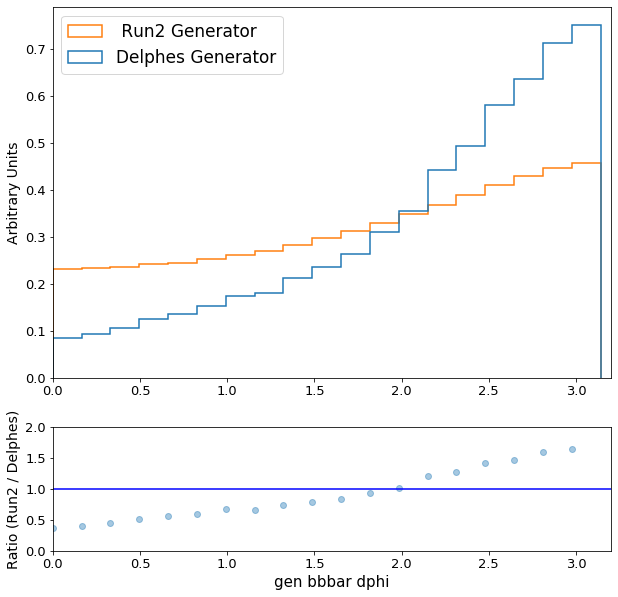

In [12]:
binning = np.linspace(0,np.pi,20)

fig_style = {
    'figsize': (10, 10),
}

ratio_fig_style = {
    'figsize': (10, 10),
    'gridspec_kw': {'height_ratios': (3, 1)},
}

y = []
y.append(bbbar_dphi)
y.append(tt_bbbar_dphi)

fig, (ax1, ax2) = plt.subplots(nrows=2, **ratio_fig_style)
ns, bins, patches = ax1.hist(y, density=True,
                      histtype='step',
                      bins=binning,
                      label=['Delphes Generator',' Run2 Generator'], linewidth=1.5
                      )
ax1.legend(prop={'size': 17}, loc='upper left')
ax1.set_xlim(0, 3.2)
ax2.scatter(bins[:-1],     # this is what makes it comparable
        ns[0] / ns[1],     # maybe check for div-by-zero!
        alpha=0.4)

ax1.set_ylabel('Arbitrary Units', fontsize=14)
#ax1.set_ylim(0,0.5)
ax2.set_ylabel('Ratio (Run2 / Delphes)', fontsize=14)
ax2.set_xlabel('gen bbbar dphi', fontsize=15)
ax2.set_ylim(0,2)
ax2.set_xlim(0,3.2)

ax1.tick_params(axis="x", labelsize=13)
ax2.tick_params(axis="x", labelsize=13)

ax1.tick_params(axis="y", labelsize=13)
ax2.tick_params(axis="y", labelsize=13)

plt.axhline(y=1, color='b', linestyle='-')
plt.show()

In [13]:
tt_pt   = tt_events_gen['gen_ttbar_pt'].array()
tt_phi  = tt_events_gen['gen_ttbar_phi'].array()
tt_eta  = tt_events_gen['gen_ttbar_rapidity'].array()
tt_mass = tt_events_gen['gen_ttbar_mass'].array()

In [14]:
ecom = []
for i in range(len(tt_pt)):
    tt_ecom  = ROOT.TLorentzVector()
    tt_ecom.SetPtEtaPhiM(tt_pt[i], tt_eta[i], tt_phi[i], tt_mass[i])
    ecom.append(tt_ecom.E())

NameError: name 'ecom' is not defined

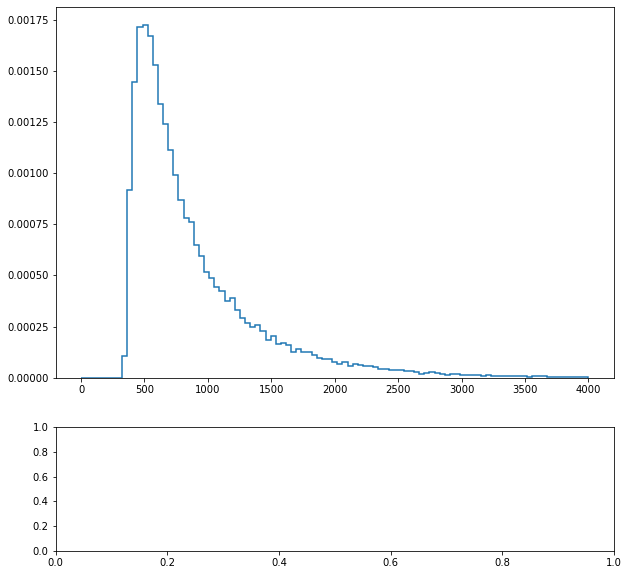

In [13]:
bins = np.linspace(0,4000, 100)

fig_style = {
    'figsize': (10, 10),
}

ratio_fig_style = {
    'figsize': (10, 10),
    'gridspec_kw': {'height_ratios': (3, 1)},
}


fig, (ax1, ax2) = plt.subplots(nrows=2, **ratio_fig_style)
ns1, bins1, patches  = ax1.hist(Ecom, density=True, histtype='step', bins=bins , label='14 TeV Delphes', linewidth=1.5)
ns2, bins2, patches  = ax1.hist(ecom, density=True , histtype='step', bins=bins , label='13 TeV Run2', linewidth=1.5)

ax1.legend(prop={'size': 17}, loc='upper right')
ax1.set_xlim(0, 4000)
ax2.scatter(bins[:-1],     # this is what makes it comparable
        ns1 / ns2,     # maybe check for div-by-zero!
        alpha=0.4)

ax1.set_ylabel('Arbitrary Units', fontsize=15)
ax1.set_yscale('log')
ax2.set_ylabel('Ratio (Run2 / Delphes)', fontsize=15)
ax2.set_xlabel('Centre of mass energy (GeV)', fontsize=15)
ax2.set_xlim(0,4000)

ax1.tick_params(axis="x", labelsize=13)
ax2.tick_params(axis="x", labelsize=13)

ax1.tick_params(axis="y", labelsize=13)
ax2.tick_params(axis="y", labelsize=13)
plt.axhline(y=1, color='b', linestyle='-')
plt.show()

In [27]:
rw = ns2/ns1

/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [28]:
ew = []
for e in  Ecom :
    for l,r in zip(range(99), range(1,100)):
        if ((bins[l] <= e) and (e <= bins[r])) :
            ew.append(rw[l])
    if (e >= 4000) :
        ew.append(rw[98])

/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


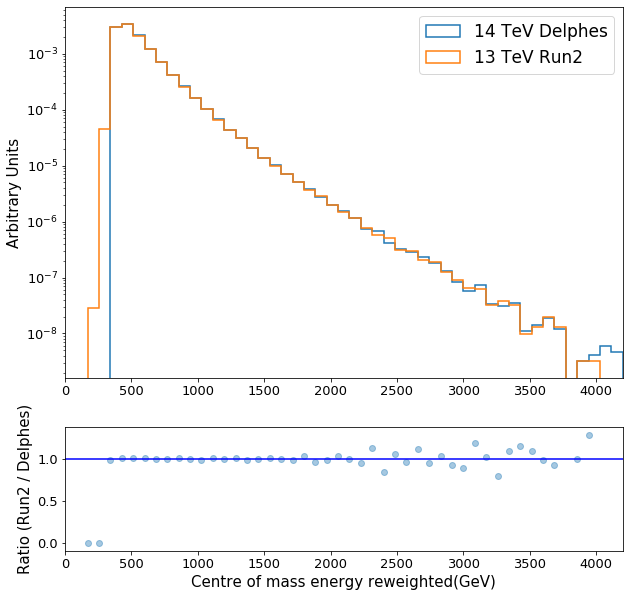

In [35]:
bins = np.linspace(0,4200, 50)

fig_style = {
    'figsize': (10, 10),
}

ratio_fig_style = {
    'figsize': (10, 10),
    'gridspec_kw': {'height_ratios': (3, 1)},
}


fig, (ax1, ax2) = plt.subplots(nrows=2, **ratio_fig_style)
ns1, bins1, patches  = ax1.hist(Ecom, density=True, histtype='step',  bins=bins , label='14 TeV Delphes', linewidth=1.5, weights=ew)
ns2, bins2, patches  = ax1.hist(ecom, density=True , histtype='step', bins=bins , label='13 TeV Run2', linewidth=1.5)

ax1.legend(prop={'size': 17}, loc='upper right')
ax1.set_xlim(0, 4200)
ax2.scatter(bins[:-1],     # this is what makes it comparable
        ns1 / ns2,     # maybe check for div-by-zero!
        alpha=0.4)

ax1.set_ylabel('Arbitrary Units', fontsize=15)
ax1.set_yscale('log')
ax2.set_ylabel('Ratio (Run2 / Delphes)', fontsize=15)
ax2.set_xlabel('Centre of mass energy reweighted(GeV)', fontsize=15)
ax2.set_xlim(0,4200)

ax1.tick_params(axis="x", labelsize=13)
ax2.tick_params(axis="x", labelsize=13)

ax1.tick_params(axis="y", labelsize=13)
ax2.tick_params(axis="y", labelsize=13)
plt.axhline(y=1, color='b', linestyle='-')
plt.show()

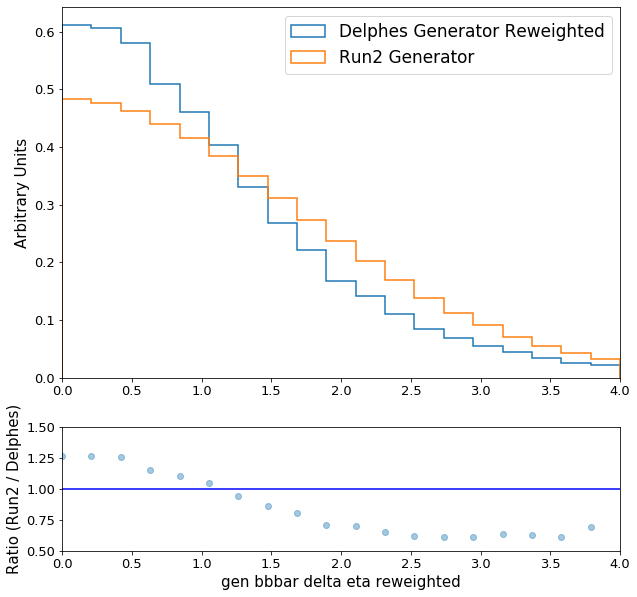

In [41]:
binning = np.linspace(0, 4, 20)

fig_style = {
    'figsize': (10, 10),
}

ratio_fig_style = {
    'figsize': (10, 10),
    'gridspec_kw': {'height_ratios': (3, 1)},
}


fig, (ax1, ax2) = plt.subplots(nrows=2, **ratio_fig_style)
ns1, bins1, patches  = ax1.hist(bbbar_deta,density=True,  histtype='step', bins=binning , label='Delphes Generator Reweighted', linewidth=1.5, weights=ew)
ns2, bins2, patches  = ax1.hist(tt_bbbar_deta, density=True , histtype='step', bins=binning , label='Run2 Generator', linewidth=1.5)

ax1.legend(prop={'size': 17}, loc='upper right')
ax1.set_xlim(0,4)
#ax1.set_ylim(0,0.35)
ax2.scatter(binning[:-1],     # this is what makes it comparable
        ns1 / ns2,         # maybe check for div-by-zero!
        alpha=0.4)

ax1.set_ylabel('Arbitrary Units', fontsize=15)
ax2.set_ylabel('Ratio (Run2 / Delphes)', fontsize=15)
ax2.set_xlabel('gen bbbar delta eta reweighted', fontsize=15)
ax2.set_ylim(0.5,1.5)
ax2.set_xlim(0,4)

ax1.tick_params(axis="x", labelsize=13)
ax2.tick_params(axis="x", labelsize=13)

ax1.tick_params(axis="y", labelsize=13)
ax2.tick_params(axis="y", labelsize=13)
plt.axhline(y=1, color='b', linestyle='-')
plt.show()

In [32]:
jet_w = [ew,ew]
tt_jet_pt        = [tt_b_pt, tt_bbar_pt]
inclusive_jet_pt = [b_jet_pt, bbar_jet_pt]

jet_w = (np.array(jet_w)).flatten()
tt_jet_pt        = (np.array(tt_jet_pt)).flatten()
inclusive_jet_pt = (np.array(inclusive_jet_pt)).flatten()

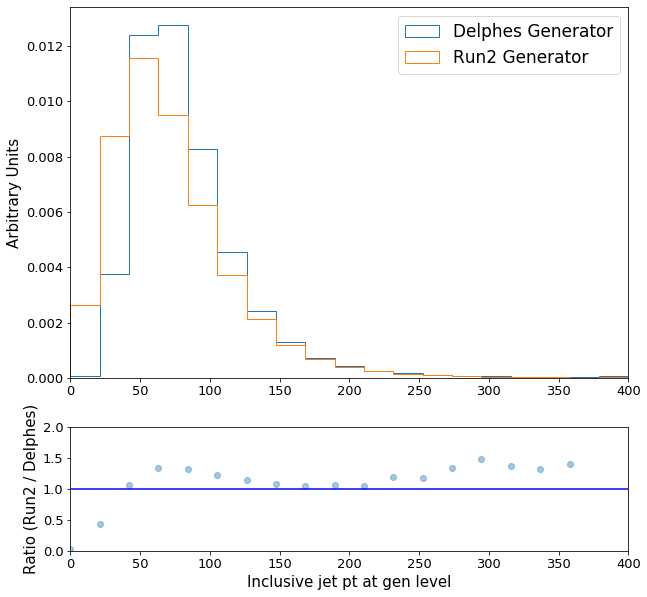

In [34]:
bins = np.linspace(0,400, 20)

fig_style = {
    'figsize': (10, 10),
}

ratio_fig_style = {
    'figsize': (10, 10),
    'gridspec_kw': {'height_ratios': (3, 1)},
}


fig, (ax1, ax2) = plt.subplots(nrows=2, **ratio_fig_style)
ns1, bins1, patches  = ax1.hist(np.clip(inclusive_jet_pt,  bins[0], bins[-1]),  density=True, histtype='step', bins=bins , label='Delphes Generator', weights=jet_w)
ns2, bins2, patches  = ax1.hist(np.clip(tt_jet_pt, bins[0], bins[-1]), density=True , histtype='step', bins=bins , label='Run2 Generator')

ax1.legend(prop={'size': 17}, loc='upper right')
ax1.set_xlim(0,400)
ax2.scatter(bins[:-1],     # this is what makes it comparable
        ns1 / ns2,     # maybe check for div-by-zero!
        alpha=0.4)

ax1.set_ylabel('Arbitrary Units', fontsize=15)
ax2.set_ylabel('Ratio (Run2 / Delphes)', fontsize=15)
ax2.set_xlabel('Inclusive jet pt at gen level', fontsize=15)
ax2.set_ylim(0,2)
ax2.set_xlim(0,400)

ax1.tick_params(axis="x", labelsize=13)
ax2.tick_params(axis="x", labelsize=13)

ax1.tick_params(axis="y", labelsize=13)
ax2.tick_params(axis="y", labelsize=13)
plt.axhline(y=1, color='b', linestyle='-')
plt.show()

In [27]:
bl_dR       = (tt_b_phi - tt_l_phi)** 2       + (tt_b_eta - tt_l_eta)** 2 
blbar_dR    = (tt_b_phi - tt_lbar_phi)** 2    + (tt_b_eta - tt_lbar_eta)** 2 
bbarl_dR    = (tt_bbar_phi - tt_l_phi)** 2    + (tt_bbar_eta - tt_l_eta)** 2 
bbarlbar_dR = (tt_bbar_phi - tt_lbar_phi)** 2 + (tt_bbar_eta - tt_lbar_eta)** 2 

dR = np.sqrt(bl_dR + blbar_dR + bbarl_dR + bbarlbar_dR)

Text(0.5, 0, 'Weight')

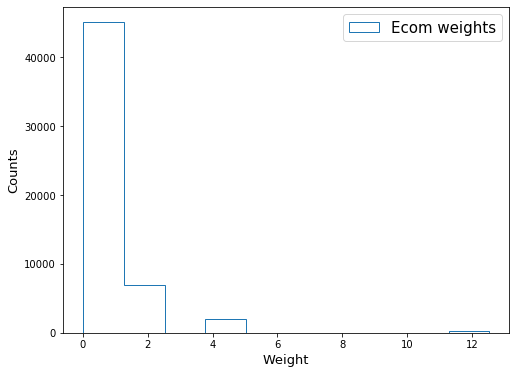

In [56]:
fig_style = {
    'figsize': (8, 6),
}

#bins = np.linspace(0,4,50)
fig, ax = plt.subplots(**fig_style)
ax.hist(ew,  histtype='step',label='Ecom weights', linewidth=1.0)
ax.legend(prop={'size': 15}, loc='upper right')
ax.set_ylabel('Counts', fontsize=13)
ax.set_xlabel('Weight', fontsize=13)

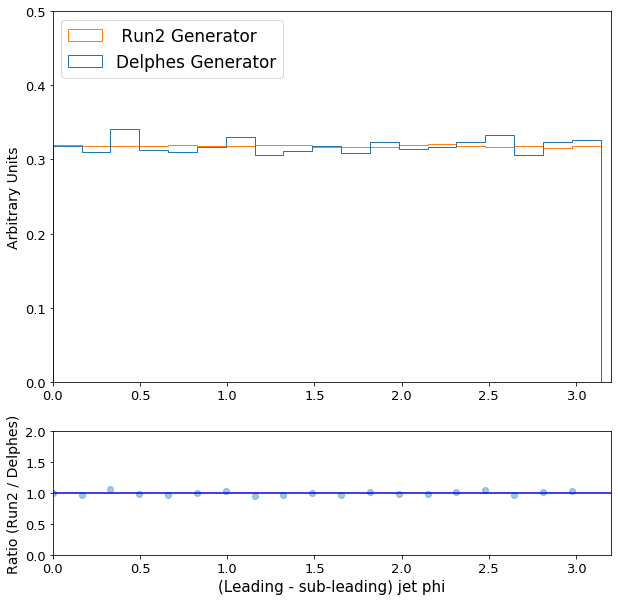

In [96]:
binning = np.linspace(0,np.pi, 20)

fig_style = {
    'figsize': (10, 10),
}

ratio_fig_style = {
    'figsize': (10, 10),
    'gridspec_kw': {'height_ratios': (3, 1)},
}

y = []
y.append(l_phi)
y.append(tt_l_phi)

fig, (ax1, ax2) = plt.subplots(nrows=2, **ratio_fig_style)
ns, bins, patches = ax1.hist(y, density=True,
                      histtype='step',
                      bins=binning,
                      label=['Delphes Generator',' Run2 Generator']
                      )
ax1.legend(prop={'size': 17}, loc='upper left')
ax1.set_xlim(0, 3.2)
ax2.scatter(bins[:-1],     # this is what makes it comparable
        ns[0] / ns[1],     # maybe check for div-by-zero!
        alpha=0.4)

ax1.set_ylabel('Arbitrary Units', fontsize=14)
ax1.set_ylim(0,0.5)
ax2.set_ylabel('Ratio (Run2 / Delphes)', fontsize=14)
ax2.set_xlabel('(Leading - sub-leading) jet phi', fontsize=15)
ax2.set_ylim(0,2)
ax2.set_xlim(0,3.2)

ax1.tick_params(axis="x", labelsize=13)
ax2.tick_params(axis="x", labelsize=13)

ax1.tick_params(axis="y", labelsize=13)
ax2.tick_params(axis="y", labelsize=13)

plt.axhline(y=1, color='b', linestyle='-')

In [20]:
len(bbbar_dphi)

5963

In [15]:
len(b_jet_phi)

5963

In [18]:
len(Ecom)

5963

In [24]:
gen_part_eta[1][]

999.9

In [12]:
jet_phi  =  np.array(jet_phi)
ajet_phi =  np.array(ajet_phi)

jet_dphi = (abs(abs(abs(jet_phi - ajet_phi) - np.pi) - np.pi))

In [36]:
jet_eta  =  np.array(jet_eta)
ajet_eta =  np.array(ajet_eta)

jet_deta = abs(jet_eta - ajet_eta)

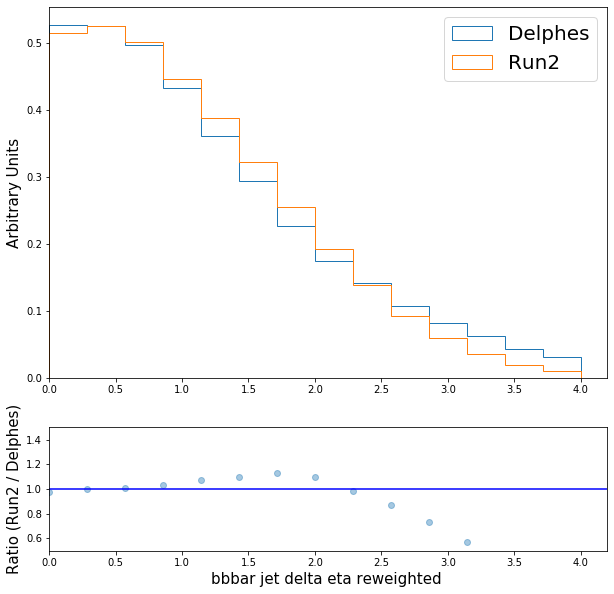

In [42]:
phi_bins = np.linspace(0, 4, 15)

ratio_fig_style = {
    'figsize': (10, 10),
    'gridspec_kw': {'height_ratios': (3, 1)},
}

fig, (ax1, ax2) = plt.subplots(nrows=2, **ratio_fig_style)
ns1, bins1, patches  = ax1.hist(jet_deta,      density=True, histtype='step', bins=phi_bins , label='Delphes', weights=ew)
ns2, bins2, patches  = ax1.hist(tt_bbbar_deta, density=True, histtype='step', bins=phi_bins , label='Run2')

ax1.legend(prop={'size': 20}, loc='upper right')
ax1.set_xlim(0, 4.2)
ax2.scatter(phi_bins[:-1],     # this is what makes it comparable
        ns2 / ns1,     # maybe check for div-by-zero!
        alpha=0.4)

ax1.set_ylabel('Arbitrary Units', fontsize=15)
ax2.set_ylabel('Ratio (Run2 / Delphes)', fontsize=15)
ax2.set_xlabel('bbbar jet delta eta reweighted ', fontsize=15)
ax2.set_ylim(0.5,1.5)
ax2.set_xlim(0,4.2)
plt.axhline(y=1, color='b', linestyle='-')
plt.show()

Text(0, 0.5, 'Arbitrary Units')

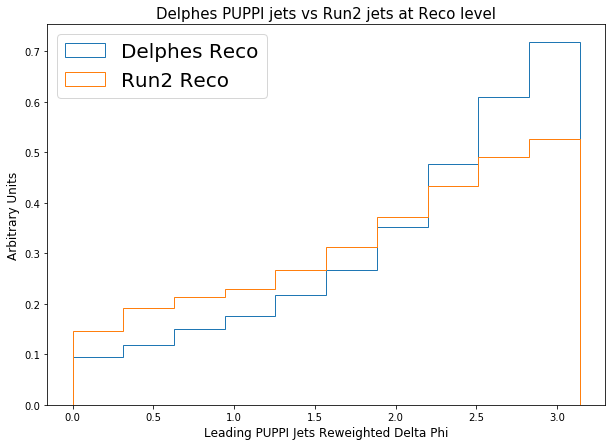

In [15]:
fig_style = {
    'figsize': (10, 7),
}

fig, ax = plt.subplots(**fig_style)

plt.title('Delphes PUPPI jets vs Run2 jets at Reco level', fontsize=15)
plt.hist(jet_dphi, histtype='step', label = 'Delphes Reco', density=True)
plt.hist(tt_bbbar_dphi, histtype='step' , label = 'Run2 Reco', density=True)

ax.legend(prop={'size': 20}, loc='upper left')
plt.xlabel('Leading PUPPI Jets Reweighted Delta Phi', fontsize=12)
plt.ylabel('Arbitrary Units', fontsize=12)

Text(0, 0.5, 'Arbitrary Units')

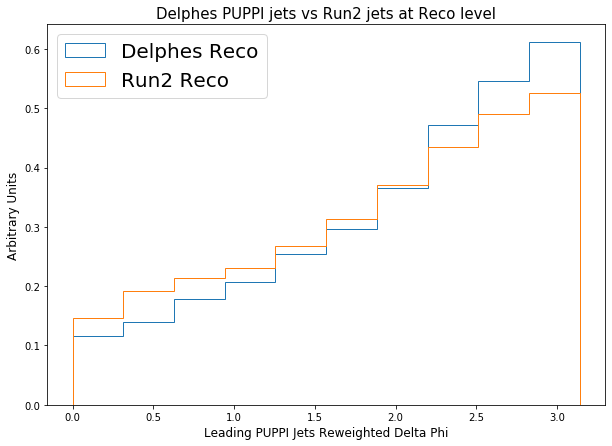

In [16]:
fig_style = {
    'figsize': (10, 7),
}

fig, ax = plt.subplots(**fig_style)

plt.title('Delphes PUPPI jets vs Run2 jets at Reco level', fontsize=15)
plt.hist(jet_dphi, histtype='step', label = 'Delphes Reco', density=True, weights=ew)
plt.hist(tt_bbbar_dphi, histtype='step' , label = 'Run2 Reco', density=True)

ax.legend(prop={'size': 20}, loc='upper left')
plt.xlabel('Leading PUPPI Jets Reweighted Delta Phi', fontsize=12)
plt.ylabel('Arbitrary Units', fontsize=12)

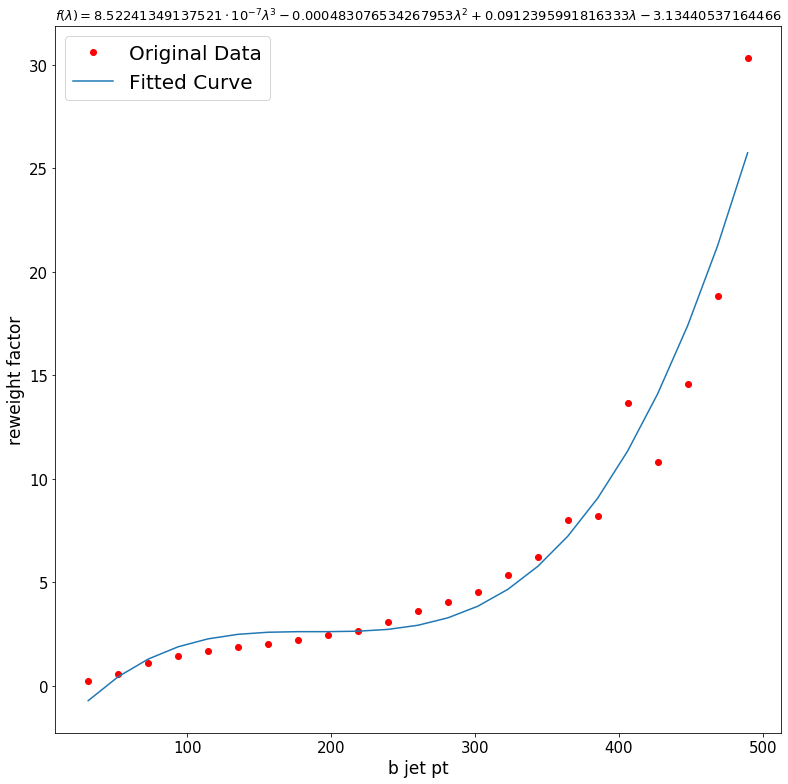

In [16]:
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import sympy as sym


#from matplotlib.pyplot import figure, axes
#figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
fig_style = {
    'figsize': (13, 13),
}

fig, ax = plt.subplots(**fig_style)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.set_xlabel('b jet pt', fontsize =17)
ax.set_ylabel('reweight factor', fontsize =17)

"""
Generate some data, let's imagine that you already have this. 
"""
x = bin_centers[1:]
y = rw

"""
Plot your data
"""
plt.plot(x, y, 'ro',label="Original Data")

"""
brutal force to avoid errors
"""    
x = np.array(x, dtype=float) #transform your data in a numpy array of floats 
y = np.array(y, dtype=float) #so the curve_fit can work

"""
create a function to fit with your data. a, b, c and d are the coefficients
that curve_fit will calculate for you. 
In this part you need to guess and/or use mathematical knowledge to find
a function that resembles your data
"""
def func(x, a, b, c, d):
    return a*x**3 + b*x**2 +c*x + d
"""
make the curve_fit
"""
popt, pcov = curve_fit(func, x, y)

"""
The result is:
popt[0] = a , popt[1] = b, popt[2] = c and popt[3] = d of the function,
so f(x) = popt[0]*x**3 + popt[1]*x**2 + popt[2]*x + popt[3].
"""
#print("a = %s , b = %s, c = %s, d = %s" % (popt[0], popt[1], popt[2], popt[3]))

"""
Use sympy to generate the latex sintax of the function
"""
xs = sym.Symbol('\lambda')    
tex = sym.latex(func(xs,*popt)).replace('$', '')
plt.title(r'$f(\lambda)= %s$' %(tex),fontsize=13)

"""
Print the coefficients and plot the funcion.
"""

plt.plot(x, func(x, *popt), label="Fitted Curve") #same as line above \/
#plt.plot(x, popt[0]*x**3 + popt[1]*x**2 + popt[2]*x + popt[3], label="Fitted Curve") 

plt.legend(loc='upper left', prop={'size': 20})
plt.savefig('Reweighting.png')
plt.show()

5626

In [18]:
def reweight(x):
    return popt[0]*x**3 + popt[1]*x**2 + popt[2]*x + popt[3]

In [19]:
jet_pt_rw = reweight(np.array(jet_pt))

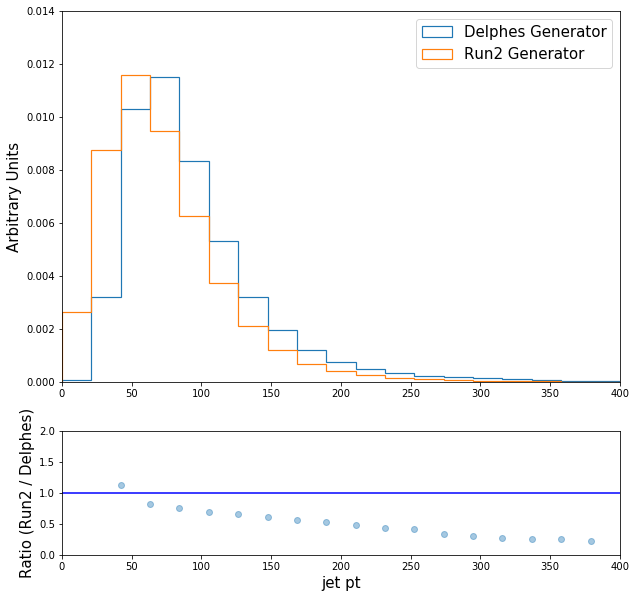

In [55]:
bins = np.linspace(0,400, 20)

fig_style = {
    'figsize': (10, 10),
}

ratio_fig_style = {
    'figsize': (10, 10),
    'gridspec_kw': {'height_ratios': (3, 1)},
}

fig, (ax1, ax2) = plt.subplots(nrows=2, **ratio_fig_style)
ns1, bins1, patches  = ax1.hist(inclusive_jet_pt,  density=True, histtype='step', bins=bins , label='Delphes Generator', linewidth=1.2)
ns2, bins2, patches  = ax1.hist(tt_jet_pt, density=True , histtype='step', bins=bins , label='Run2 Generator', linewidth=1.2)

ax1.legend(prop={'size': 15}, loc='upper right')
ax1.set_xlim(0, 400)
ax1.set_ylim(0, 0.014)
ax2.scatter(bins[:-1],     # this is what makes it comparable
        ns2 / ns1,     # maybe check for div-by-zero!
        alpha=0.4)

ax1.set_ylabel('Arbitrary Units', fontsize=15)
ax2.set_ylabel('Ratio (Run2 / Delphes)', fontsize=15)
ax2.set_xlabel('jet pt', fontsize=15)
ax2.set_ylim(0,2)
ax2.set_xlim(0,400)
plt.axhline(y=1, color='b', linestyle='-')
plt.show()

In [27]:
jet_dphi = []
for i in range(len(jet_PUPPI_phi)) :
    if (len(jet_PUPPI_phi[i]) > 1) :
        if (jet_PUPPI_pt[i][1] > 30) :
            
            jet4vec  = ROOT.TLorentzVector()
            jet4vec.SetPtEtaPhiM(jet_PUPPI_pt[i][0], jet_PUPPI_eta[i][0], jet_PUPPI_phi[i][0], jet_PUPPI_mass[i][0])

            ajet4vec = ROOT.TLorentzVector()
            ajet4vec.SetPtEtaPhiM(jet_PUPPI_pt[i][1], jet_PUPPI_eta[i][1], jet_PUPPI_phi[i][1], jet_PUPPI_mass[i][1])
        
            jet_dphi.append(abs(jet4vec.DeltaPhi(ajet4vec)))

In [47]:
jet_phi  =  np.array(jet_phi)
ajet_phi =  np.array(ajet_phi)

In [38]:
len(ew)

5963

(array([20779., 11669.,     0.,     0., 18279.,     0.,     0.,     0.,
            0.,  3509.]),
 array([7.48197879e-04, 3.66230623e-01, 7.31713048e-01, 1.09719547e+00,
        1.46267790e+00, 1.82816032e+00, 2.19364275e+00, 2.55912517e+00,
        2.92460760e+00, 3.29009002e+00, 3.65557245e+00]),
 <a list of 10 Patch objects>)

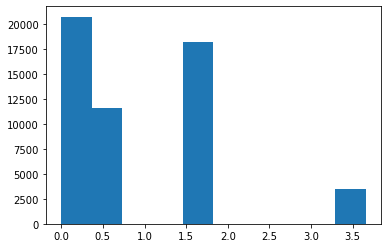

In [57]:
plt.hist(ew)

In [27]:
jet_dphi = []
for i in range(len(jet_PUPPI_phi)) :
    if (len(jet_PUPPI_phi[i]) > 1) :
        if (jet_PUPPI_pt[i][1] > 30) and (abs(jet_PUPPI_eta[i][0]) < 2.5) and (abs(jet_PUPPI_eta[i][1]) < 2.5) :
            
            jet4vec    = ROOT.TLorentzVector()
            jet_rw_pt  = reweight(jet_PUPPI_pt[i][0])
            jet4vec.SetPtEtaPhiM(jet_rw_pt, jet_PUPPI_eta[i][0], jet_PUPPI_phi[i][0], jet_PUPPI_mass[i][0])

            ajet4vec   = ROOT.TLorentzVector()
            ajet_rw_pt = reweight(jet_PUPPI_pt[i][1])
            ajet4vec.SetPtEtaPhiM(ajet_rw_pt, jet_PUPPI_eta[i][1], jet_PUPPI_phi[i][1], jet_PUPPI_mass[i][1])
        
            jet_dphi.append(abs(jet4vec.DeltaPhi(ajet4vec)))

Text(0, 0.5, 'Arbitrary Units')

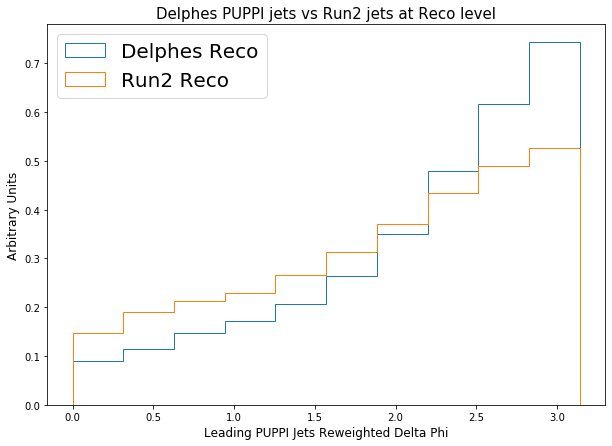

In [28]:
fig_style = {
    'figsize': (10, 7),
}

fig, ax = plt.subplots(**fig_style)

plt.title('Delphes PUPPI jets vs Run2 jets at Reco level', fontsize=15)
plt.hist(jet_dphi, histtype='step', label = 'Delphes Reco', density=True)
plt.hist(tt_bbbar_dphi, histtype='step' , label = 'Run2 Reco', density=True)

ax.legend(prop={'size': 20}, loc='upper left')
plt.xlabel('Leading PUPPI Jets Reweighted Delta Phi', fontsize=12)
plt.ylabel('Arbitrary Units', fontsize=12)

In [21]:
gen_jet_charge

<JaggedArray [[0 1 0 -1 0] [1 1 -1 2 -2] [-2 0 -1 2] ... [-3 0 -3 ... -1 4 0] [-1 0 1 ... -1 -2 0] [0 1 1 ... 0 -3 0]] at 0x0003c298d400>

In [6]:
gen_part_pid[2]

array([  21,   21,    6,   -6,    6,   -6,    6,   -6,   -6,    6,   -6,
          6,   -6,    6,    6,   -6,    6,   -6,    5,   24,   -5,  -24,
         -5,  -24,   -5,   -5,   -5,   -5,  -13,   14,  -13,   22,   14,
         11,  -12,   -5,  523,    5, -513,   22,   22,   22,   22,   22,
         22,   22,   22,   22,   22,   22,   22,   22,   22,   22,   22,
         22,   22,   22,   22,   22,   22,   22,   22,   22,   22,  521,
         22, -511,   22,   22,   22,   22,   22,   22,   22,   22,   22,
         22,   22,   22,   22,   22,   22,   22,   22,   22,   22,   22,
         22,   22,   22,   22,   22,   22,   22,   22,   22,   22,   22,
         11,  -11,   22,   22,   22,   22,   22,   22,   22,   22,   22,
         22,   22,   22,   22,   22,   22,   22,   22,   22,   22,   22,
         22,   22,   22,   22,   22,   22,   22,   22,   22,   22,   22,
         22,   22,   22,   22,   22,   22,   22,   22,   22,   22,   22,
         22,   22,   22,   22,   22,   22,   22,   

In [11]:
Ecom = []
for i in range(len(gen_part_pid)):
    top     = ROOT.TLorentzVector()
    top.SetPtEtaPhiM(gen_part_pt[i][2],gen_part_eta[i][2], gen_part_phi[i][2],gen_part_mass[i][2])
    
    antitop = ROOT.TLorentzVector()
    antitop.SetPtEtaPhiM(gen_part_pt[i][3],gen_part_eta[i][3], gen_part_phi[i][3],gen_part_mass[i][3])
    
    com = top + antitop
    Ecom.append(com.E())

Text(0, 0.5, 'Arbitrary Units')

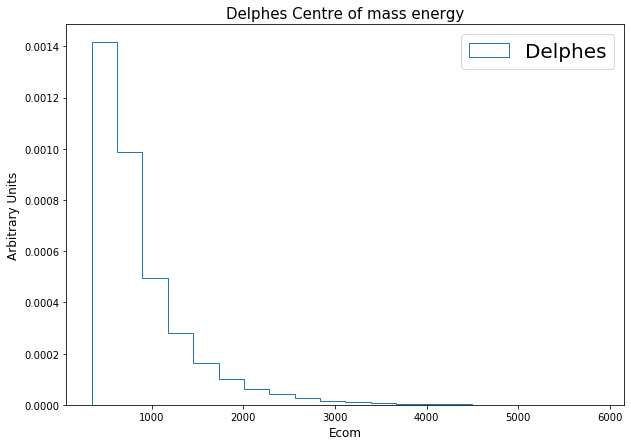

In [20]:
fig_style = {
    'figsize': (10, 7),
}

fig, ax = plt.subplots(**fig_style)

plt.title('Delphes Centre of mass energy', fontsize=15)
plt.hist(Ecom, histtype='step', label = 'Delphes', density=True, bins=20)

ax.legend(prop={'size': 20}, loc='upper right')
plt.xlabel('Ecom', fontsize=12)
plt.ylabel('Arbitrary Units', fontsize=12)

In [19]:
min(Ecom)

345.66965342820663

In [21]:
tt_events_gen     = uproot.open('emu_ttbarsignalplustau.root')['ttBar_treeVariables_step0']

In [26]:
tt_pt   = tt_events_gen['gen_ttbar_pt'].array()
tt_phi  = tt_events_gen['gen_ttbar_phi'].array()
tt_eta  = tt_events_gen['gen_ttbar_rapidity'].array()
tt_mass = tt_events_gen['gen_ttbar_mass'].array()

In [30]:
ecom = []
for i in range(len(tt_pt)):
    tt_ecom  = ROOT.TLorentzVector()
    tt_ecom.SetPtEtaPhiM(tt_pt[i], tt_eta[i], tt_phi[i], tt_mass[i])
    ecom.append(tt_ecom.E())

/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


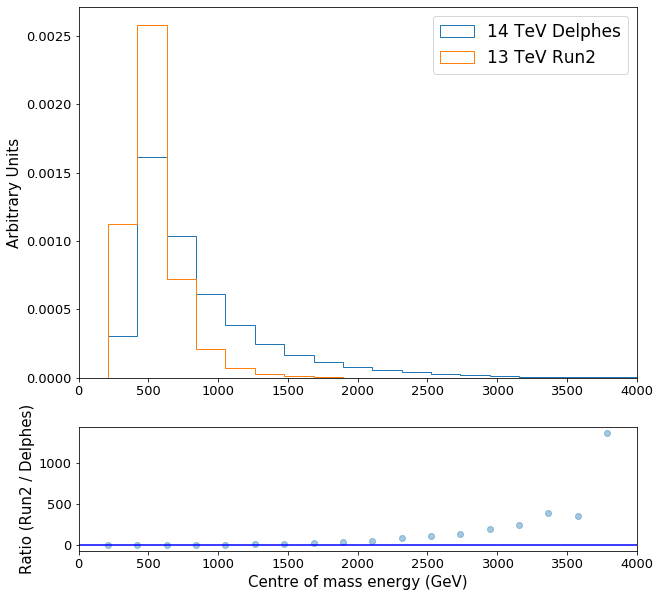

In [58]:
bins = np.linspace(0,4000, 20)

fig_style = {
    'figsize': (10, 10),
}

ratio_fig_style = {
    'figsize': (10, 10),
    'gridspec_kw': {'height_ratios': (3, 1)},
}


fig, (ax1, ax2) = plt.subplots(nrows=2, **ratio_fig_style)
ns1, bins1, patches  = ax1.hist(Ecom, density=True, histtype='step', bins=bins , label='14 TeV Delphes')
ns2, bins2, patches  = ax1.hist(ecom, density=True , histtype='step', bins=bins , label='13 TeV Run2')

ax1.legend(prop={'size': 17}, loc='upper right')
ax1.set_xlim(0, 4000)
ax2.scatter(bins[:-1],     # this is what makes it comparable
        ns1 / ns2,     # maybe check for div-by-zero!
        alpha=0.4)

ax1.set_ylabel('Arbitrary Units', fontsize=15)
ax2.set_ylabel('Ratio (Run2 / Delphes)', fontsize=15)
ax2.set_xlabel('Centre of mass energy (GeV)', fontsize=15)
#ax2.set_ylim(0,2)
ax2.set_xlim(0,4000)

ax1.tick_params(axis="x", labelsize=13)
ax2.tick_params(axis="x", labelsize=13)

ax1.tick_params(axis="y", labelsize=13)
ax2.tick_params(axis="y", labelsize=13)
plt.axhline(y=1, color='b', linestyle='-')
plt.show()

/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


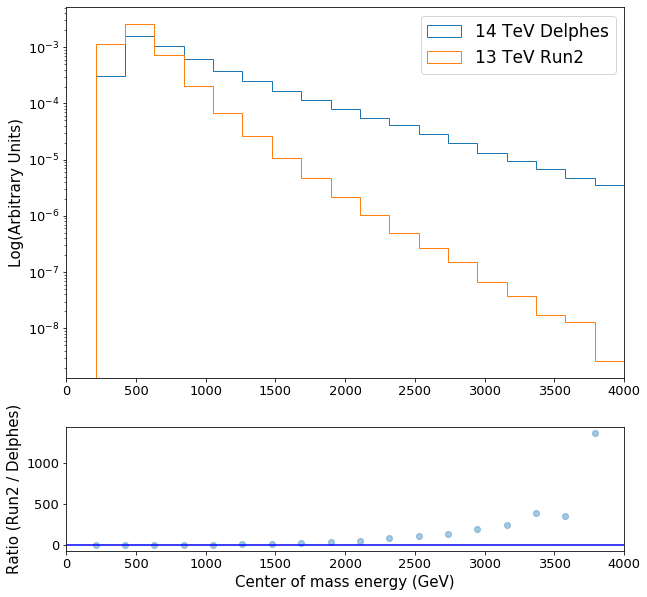

In [59]:
bins = np.linspace(0,4000, 20)

fig_style = {
    'figsize': (10, 10),
}

ratio_fig_style = {
    'figsize': (10, 10),
    'gridspec_kw': {'height_ratios': (3, 1)},
}


fig, (ax1, ax2) = plt.subplots(nrows=2, **ratio_fig_style)
ns1, bins1, patches  = ax1.hist(Ecom, density=True, histtype='step', bins=bins , label='14 TeV Delphes')
ns2, bins2, patches  = ax1.hist(ecom, density=True , histtype='step', bins=bins , label='13 TeV Run2')

ax1.legend(prop={'size': 17}, loc='upper right')
ax1.set_xlim(0, 4000)
ax2.scatter(bins[:-1],     # this is what makes it comparable
        ns1 / ns2,     # maybe check for div-by-zero!
        alpha=0.4)

ax1.set_ylabel('Log(Arbitrary Units)', fontsize=15)
ax2.set_ylabel('Ratio (Run2 / Delphes)', fontsize=15)
ax2.set_xlabel('Center of mass energy (GeV)', fontsize=15)
ax2.set_xlim(0,4000)
ax1.set_yscale('log')

ax1.tick_params(axis="x", labelsize=13)
ax2.tick_params(axis="x", labelsize=13)

ax1.tick_params(axis="y", labelsize=13)
ax2.tick_params(axis="y", labelsize=13)
plt.axhline(y=1, color='b', linestyle='-')
plt.show()

In [35]:
tt_mass = tt_events_gen['gen_ttbar_mass'].array()

In [39]:
new_ecom = []
for i in range(len(tt_t_pt)) :
    
    top = ROOT.TLorentzVector()
    top.SetPtEtaPhiM(tt_t_pt[i], tt_t_eta[i], tt_t_phi[i], 172.5)
    atop = ROOT.TLorentzVector()
    atop.SetPtEtaPhiM(tt_tbar_pt[i], tt_tbar_eta[i], tt_tbar_phi[i], 172.5)
    
    ecom = top + atop
    new_ecom.append(ecom.E())

(array([3.187554e+06, 3.415230e+05, 6.899400e+04, 1.582400e+04,
        3.314000e+03, 6.490000e+02, 8.900000e+01, 1.300000e+01,
        1.000000e+00, 1.000000e+00]),
 array([ 345.00275397,  940.78587745, 1536.56900092, 2132.35212439,
        2728.13524786, 3323.91837133, 3919.70149481, 4515.48461828,
        5111.26774175, 5707.05086522, 6302.83398869]),
 <a list of 1 Patch objects>)

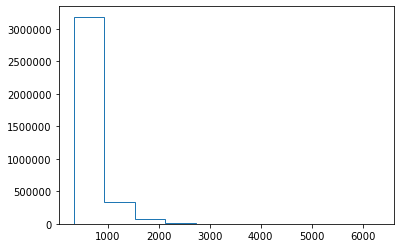

In [43]:
plt.hist(new_ecom, histtype='step')

In [45]:
min(new_ecom)

345.00275397402595

/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


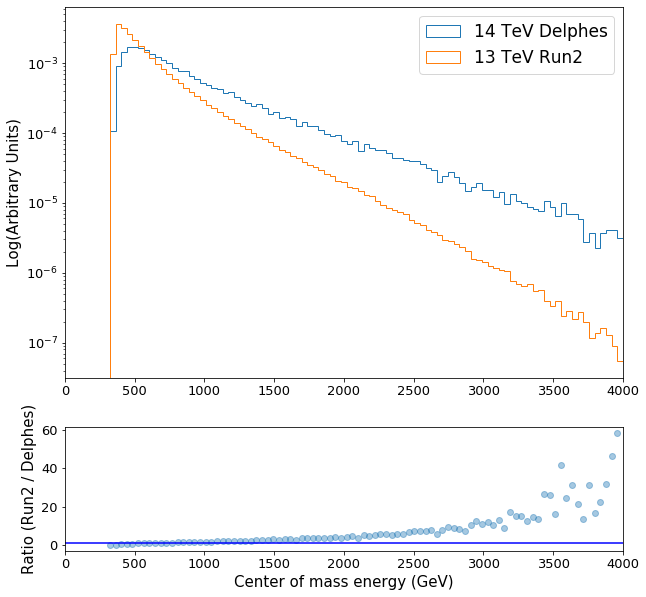

In [47]:
bins = np.linspace(0,4000, 100)

fig_style = {
    'figsize': (10, 10),
}

ratio_fig_style = {
    'figsize': (10, 10),
    'gridspec_kw': {'height_ratios': (3, 1)},
}


fig, (ax1, ax2) = plt.subplots(nrows=2, **ratio_fig_style)
ns1, bins1, patches  = ax1.hist(Ecom, density=True, histtype='step', bins=bins , label='14 TeV Delphes')
ns2, bins2, patches  = ax1.hist(new_ecom, density=True , histtype='step', bins=bins , label='13 TeV Run2')

ax1.legend(prop={'size': 17}, loc='upper right')
ax1.set_xlim(0, 4000)
ax2.scatter(bins[:-1],     # this is what makes it comparable
        ns1 / ns2,     # maybe check for div-by-zero!
        alpha=0.4)

ax1.set_ylabel('Log(Arbitrary Units)', fontsize=15)
ax2.set_ylabel('Ratio (Run2 / Delphes)', fontsize=15)
ax2.set_xlabel('Center of mass energy (GeV)', fontsize=15)
ax2.set_xlim(0,4000)
ax1.set_yscale('log')

ax1.tick_params(axis="x", labelsize=13)
ax2.tick_params(axis="x", labelsize=13)

ax1.tick_params(axis="y", labelsize=13)
ax2.tick_params(axis="y", labelsize=13)
plt.axhline(y=1, color='b', linestyle='-')
plt.show()

In [49]:
rw = ns2/ns1

ew = []
for e in  Ecom :
    for l,r in zip(range(99), range(1,100)):
        if ((bins[l] <= e) and (e <= bins[r])) :
            ew.append(rw[l])
    if (e >= 4000) :
        ew.append(rw[98])

/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


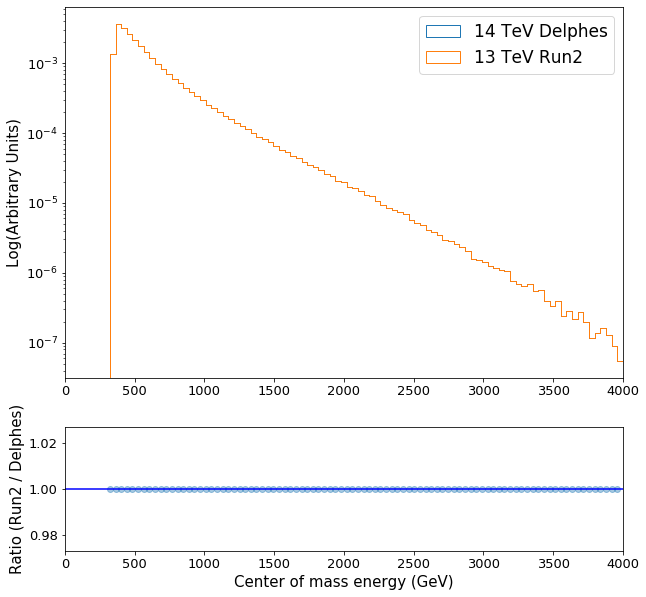

In [51]:
bins = np.linspace(0,4000, 100)

fig_style = {
    'figsize': (10, 10),
}

ratio_fig_style = {
    'figsize': (10, 10),
    'gridspec_kw': {'height_ratios': (3, 1)},
}


fig, (ax1, ax2) = plt.subplots(nrows=2, **ratio_fig_style)
ns1, bins1, patches  = ax1.hist(Ecom, density=True, histtype='step', bins=bins , label='14 TeV Delphes', weights=ew)
ns2, bins2, patches  = ax1.hist(new_ecom, density=True , histtype='step', bins=bins , label='13 TeV Run2')

ax1.legend(prop={'size': 17}, loc='upper right')
ax1.set_xlim(0, 4000)
ax2.scatter(bins[:-1],     # this is what makes it comparable
        ns1 / ns2,     # maybe check for div-by-zero!
        alpha=0.4)

ax1.set_ylabel('Log(Arbitrary Units)', fontsize=15)
ax2.set_ylabel('Ratio (Run2 / Delphes)', fontsize=15)
ax2.set_xlabel('Center of mass energy (GeV)', fontsize=15)
ax2.set_xlim(0,4000)
ax1.set_yscale('log')

ax1.tick_params(axis="x", labelsize=13)
ax2.tick_params(axis="x", labelsize=13)

ax1.tick_params(axis="y", labelsize=13)
ax2.tick_params(axis="y", labelsize=13)
plt.axhline(y=1, color='b', linestyle='-')
plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-57-54a7cd2f2b5c>", line 9, in <module>
    ns1, bins1, patches  = ax1.hist(jet_deta,      density=True, histtype='step', bins=phi_bins , label='Delphes', weights=ew)
NameError: name 'jet_deta' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2040, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/IPython/core/ultratb

NameError: name 'jet_deta' is not defined

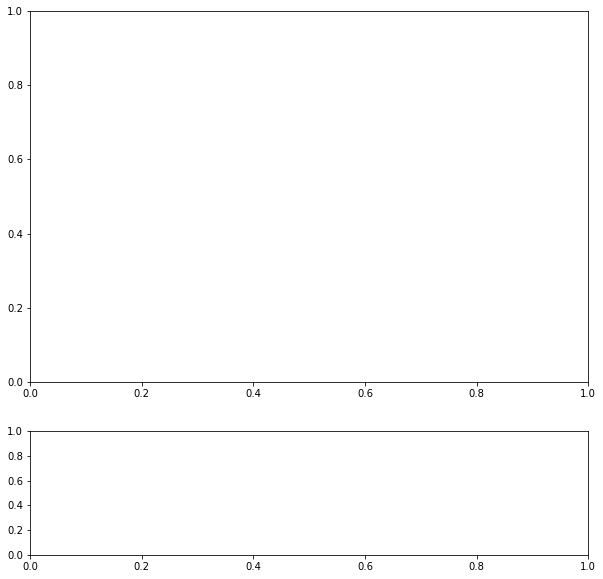

In [57]:
phi_bins = np.linspace(0, 4, 15)

ratio_fig_style = {
    'figsize': (10, 10),
    'gridspec_kw': {'height_ratios': (3, 1)},
}

fig, (ax1, ax2) = plt.subplots(nrows=2, **ratio_fig_style)
ns1, bins1, patches  = ax1.hist(jet_deta,      density=True, histtype='step', bins=phi_bins , label='Delphes', weights=ew)
ns2, bins2, patches  = ax1.hist(tt_bbbar_deta, density=True, histtype='step', bins=phi_bins , label='Run2')

ax1.legend(prop={'size': 20}, loc='upper right')
ax1.set_xlim(0, 4.2)
ax2.scatter(phi_bins[:-1],     # this is what makes it comparable
        ns2 / ns1,     # maybe check for div-by-zero!
        alpha=0.4)

ax1.set_ylabel('Arbitrary Units', fontsize=15)
ax2.set_ylabel('Ratio (Run2 / Delphes)', fontsize=15)
ax2.set_xlabel('bbbar jet delta eta reweighted ', fontsize=15)
ax2.set_ylim(0.5,1.5)
ax2.set_xlim(0,4.2)
plt.axhline(y=1, color='b', linestyle='-')
plt.show()